# Abstract 

The goal of this project is to create a code for analysing colour difference through measuring Euclidean distance between RGB terms. The datasets used compare averaged RGB colours labelled by human perception to the X11 list of hundreds of predefined RGB values with unique colour labels.

The first data set used is X11 developed by MIT for computer display systems [X11](https://www.w3schools.com/colors/colors_x11.asp)and the second from averages calculated from [colour naming] data (http://colournaming.org).
m. 
 I give a measurement of the difference between the X11 reference list and named colours by calculating the 3D Euclidean distance in x,y,z space between two RGB points [colour difference](https://en.wikipedia.org/wiki/Color_difference). This information is represented visually in a bar chart showing distances between RGB values between the datasets. I have also included a visual comparison for each representation of the user's colour terms. 

Finally, I calculate the complementary colours for each colour term for both versions. Complementary colours are considered a colours opposite since they cancel to white, so this provides a visual representation of difference for comparison.  

My results indicate a gap between users recognition of colours and the X11 lists that is not consistent across colours. Further insight into these colour differences can be drawn by reference to the calculated complementary colours. I consider various interpretations of such a colour differece including language and the repective purposes of colour naming for humans and computers. 


## Keywords: colour naming, X11, python, colour difference, RGB

## Introduction

The aim of this project is to provide tools for measuring and analysing colour difference between two datasets. The data sets used here compare colour naming responses to colours to the X11 list used for computing. The results point to some differences between human and computer perception, and the arbitrariness of colour categories. The program gives a number of outputs that serve slightly different purposes, but all contribute to the goal of analysing and comparing the contents of two texts.




# Methods
The colour naming dataset consists of thousands of RGB values matched to colour terms by thousands of participants. Since each term is mapped to many values, I create a list based on the average RGB value for each term


The project mainly makes use of numpy arrays as data structures to represent colours terms respective to RGB values as they allow data to be represented in 3 dimensions, which is useful for mapping RGB triplets and measuring colour difference with a 3D euclidean distance function that takes 2 arrays as arguments. They also allow for faster performance of calculations. My results include a time calculation to demonstrate this. 

I also create a dictionary for the X11 values, that allows for RGB values to be accessed by their corresponding name. There is a possibility to develop the code to include a random generator of colour terms that picks values from these sets but is space constrained. 

I import various modules including pandas and numpy for multidimensional data structures, matplotlib for graphs and PIL to create images from numpy arrays of RGB values.

An explanation and account of further methods will be interspersed into code in both comments and text boxes.

In [57]:
#import modules for later use
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import time
import string
from PIL import Image
%matplotlib inline

In [58]:
#define functions to call later in code
def dict_triplets(file):
    
    """ opens relevant sections of csv into a DataFrame and returns a dictionary of RGB
    terms as values with colour names as keys cleaned for analysis"""
    x11 = pd.read_csv(file, usecols= ['colour_name','R', 'G', 'B'])
    x11_dict_triplets = x11.set_index('colour_name').T.to_dict('list')
    translator = str.maketrans({' ': ''})
    x11_dict_triplets = dict((k.lower().translate(translator), v) for k, v in x11_dict_triplets.items()) 
    
    return x11_dict_triplets
    

def means(df, word):
    """creates an array of for known words and mean RGB values """
    sub = df[df['colour_name'].isin([word])]
    meanRGB = [sub.R.mean(), sub.G.mean(), sub.B.mean()]
   
    

    return meanRGB

def euclidist3D(ary1,ary2):
       
    """Caculates 3D euclidean distances using slices to identify R, G & Bs from two arrays """ 
    de = np.sqrt((np.square(ary1[:,0] - ary2[:,0]))
    + np.square(ary1[:,1]- ary2[:,1])
    + np.square(ary1[:,2] - ary2[:,2]))
    return de


def timer(ary1, ary2):
    """ times how long it takes to calculate the euc distances with 
    time module and by calling euclidist3D"""
    start = time.perf_counter()
    de1 = euclidist3D(ary1,ary2)
    end = time.perf_counter()
    time_perf = end - start
    return time_perf


def check_distance(de):
    """The rounded euclid distance between X11 and rgb values
    for default settings should equal to 92"""
    rde = int(round(np.mean(de)))
    assert(rde == 92), 'Something wrong, should be 92'
    return 'All Good! distance is',rde

def subtract(ary1,ary2):
    """ subtract one array from another"""
    de = ary1 - ary2
    return de

def makeimage(rgb1, rgb2):
    '''creates images comparing colours '''
    plt.figure ()
    image_ary = np.zeros([100, 200, 3], dtype=np.uint8)

    image_ary[50::] = [rgb1] # Yellow left side MAKE IT TOP BOTTOMW
    image_ary[:50:] = [rgb2]   # Blue right side
    img = Image.fromarray(image_ary)
    
    plt.imshow(img)
    plt.axis('off')
    plt.savefig('colour_pair.png')
    return img

### Setting colour terms 

I give a default list of colour terms including two non-colours that will not appear in the data set. I give the user the option to use default or add their own terms up to 14 terms. I clean the data so that the terms are consistent with the terms from the datasets.

In [59]:
#words
cterms = ['white', 'black', 'red', 'yellow', 'blue', 'green', 'brown', 'purple', 'orange', 'pink', 'lorem', 'ipsum']

    
    #create own list of terms 
terms  = input('use default terms? (y/n)')

if terms == 'n':
    cterms = []
   
    while len(cterms)<14:
            
        a = input("Ok, Enter a colour term (input colour terms without spaces):")
        cterms.append(a)
        if a == 'done': break
    
    
    
cterms = [x.lower().strip() for x in cterms]

# removes empty values, though empty values would not find a match in datasets it is neater
# provides two ways for user to input less than 14 colours (either enter done or leave blank boxes)
while '' in cterms:
    cterms.remove('')



use default terms? (y/n)y


### Loading Files & Locating Terms 

In [60]:
file = '/Users/user/Desktop/python/rgb_x11.csv'

#Calling dict_triplets to create a dictionary from X11 values from file path
x11_dict_triplets = (dict_triplets(file))
#could use this dictionary to create a list of random terms

# opens RGB colour data into a data frame data frame 
rgbdata = pd.read_csv('data.csv', usecols = ['colour_name', 'R', 'G', 'B'])
#clean data
rgbdata.colour_name = rgbdata.colour_name.str.lower().str.strip().str.replace('-', ' ')


#List comprehension for user's terms in both sets of data
known_cterms = [word for word in cterms if word in rgbdata.colour_name.values and word in x11_dict_triplets.keys() ]
unkown_cterms = [word for word in cterms if word not in rgbdata.colour_name.values or word not in x11_dict_triplets.keys()]



In [61]:
# call function and populate an array and create a dataframe from it

#labels = ['R', 'G', 'B']
#puts values into an array with dimensions length cterms, and (3)

meanRGB_ary = np.zeros((len(known_cterms),3))

#fills with mean values of known terms
for row,column in enumerate (known_cterms):
    meanRGB_ary[row]=means(rgbdata,column)

#dataframe add headings and data
RGBtable = pd.DataFrame(meanRGB_ary , columns = ['R','G','B'])
RGBtable.insert(0, "colour_name", known_cterms)

#make array, fill with cterms
#loop through known cterms add values
# make an array from x11 dictionary triplets so individual RGBs can be located for euclid

#why array rather than data frame??
cterms_ary = np.zeros((len(known_cterms),3))
for idx,name in enumerate (known_cterms):
    cterms_ary[idx]=x11_dict_triplets[name][0:3]


# Analysis & Visualisations

### Calculating Euclidean Distance in 3D
Here I use arrays created above to pass into the Euclidist3D function. I create an array of colours for use in functions as well as a dictionary to map results to their respective keys. I also use the timer function to give the speed of the calculation. 

In [62]:


#calls function to caculate Euclidean distance between terms 
euc = (euclidist3D(meanRGB_ary, cterms_ary))


#IF DEFAULT - AUTOMATIC TEST
#this only works on default terms so have put into if clause 
if terms == 'y':
    check_distance(euc)


#a dictionary of colour terms as keys and euclidist as values put into a dictionary using dict & zip
# zip with colour labels into a dictionary to display distances for each colour
zippy_euc = dict(zip(known_cterms, euc))
print(f'Found matches for {len(known_cterms)} out of {len(cterms)} terms:')
print(f'Found these terms: {known_cterms}')
print(f'Could not locate these terms: {unkown_cterms}')

print(f'These are the values for the euclidist: {zippy_euc}.')
#Call time function
print(f'It took {timer(meanRGB_ary, cterms_ary)} seconds to complete your task')

Found matches for 10 out of 12 terms:
Found these terms: ['white', 'black', 'red', 'yellow', 'blue', 'green', 'brown', 'purple', 'orange', 'pink']
Could not locate these terms: ['lorem', 'ipsum']
These are the values for the euclidist: {'white': 50.145853028577754, 'black': 46.33544715435278, 'red': 96.25679143810677, 'yellow': 91.98228963582174, 'blue': 145.99160821937625, 'green': 157.55386108133595, 'brown': 59.62744668321111, 'purple': 104.71006013918593, 'orange': 77.08833817525755, 'pink': 91.61385989525076}.
It took 5.822800085297786e-05 seconds to complete your task


## Visualisations 
In this section I create multiple visulations of colour difference.
## Euclidean Distance between X11 and averaged values


<Figure size 720x864 with 0 Axes>

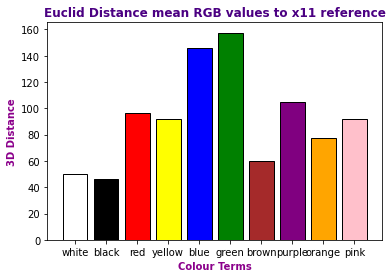

<Figure size 720x864 with 0 Axes>

In [63]:
#make sure the same length 
assert len(RGBtable) == len(cterms_ary), 'should be the same size'

#using matplotlib create a bar chart for terms and euclidean distances 
#labels from known cterms and values from calculated euc array
plt.bar(known_cterms, euc, color = known_cterms, edgecolor='black')

plt.xlabel('Colour Terms',fontweight='bold', color= 'darkmagenta')

plt.title('Euclid Distance mean RGB values to x11 reference',fontweight='bold', color= 'indigo')

plt.ylabel('3D Distance' ,fontweight='bold', color= 'darkmagenta')
#increase size
plt.figure(figsize=(10,12))

### Results of difference measure

I create a bar chart visualising Euclidean distance using the arrays created above using matplotlib with colour terms as colours for the bars. The greater the distance, the greater the difference between terms. We should see this reflected in the colour comparison squares below. In the default settings, we can see that the difference between X11 and named colours is greatest between green and blue. This could be attributed to an unclear boundary between blue and green. This optical illusion gives a good example of how the distinction of blue and green could be unobvious to a perceiver (what looks blue and green in the image is actually the same colour). 
We can also see that black and white show the least variance. This would seem intuitively true, since these two colour concepts are well defined, black being the absence of colour and white the result of equal measures of blue, red and green cancelling out. 
These facts should also be reflected in the side by side visualisations below.

![image](https://images.ctfassets.net/cnu0m8re1exe/48c5kz3TqMCYHMomIi5R9Y/e40a49b14a0dd8b821ceec8ab04f362c/colors.gif?w=650)



 

# Visualising Colour Difference (EucDist)

I provide visualisations of the differences measured above by filling the top half of an image with X11 and the bottom with averaged values.

The results visually present the distance measured by euclidean distance. While each box displays a clear difference between the colours, it is difficult to perceive through colours alone the degrees of similarity for each. So measuring by euclidean distance is a more objective way to examine the difference. This also points to the limitations in human perception discussed above. 

<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A594E80>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42B314760>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A855760>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42B086B80>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42B3343A0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A098AF0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42B357310>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42B34BD00>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42AA150D0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A939F70>


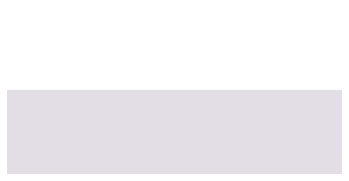

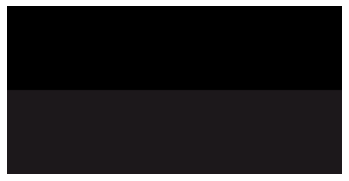

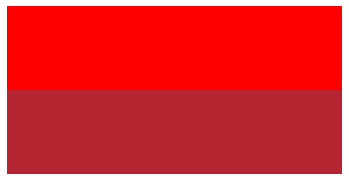

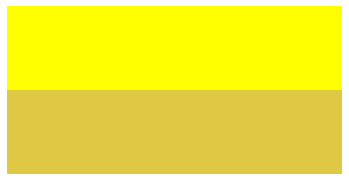

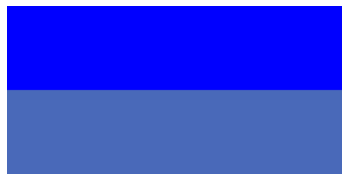

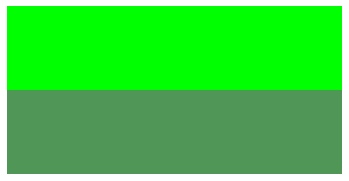

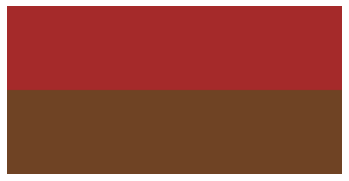

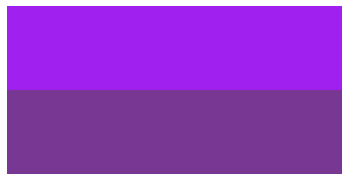

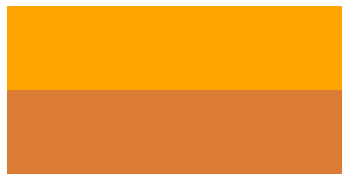

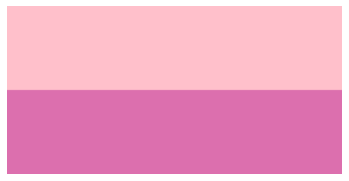

In [64]:
#Make Pretty colours 
#creates arrays ordered by term but removes name to pass into the makeimage function

assert len(cterms_ary) == len(meanRGB_ary), 'lists must be equal'
        
#plt.savefig('colour_pair.png')    


#iterate through RGBavg and X11 arrays calling make image function 
# because this function call iterates through so much data to create many images it is noticably slow

for idx, name in enumerate(meanRGB_ary):
    
    print(makeimage(name, cterms_ary[idx]))


## Complementary colours for X11

I have adapted the code to search for complementary colours. I do this by creating an array filled with the RGB values for white and subtracting each RGB from it, since complementary colours cancel out to make white. They are opposites because of this property, so give a good visual representation of colour difference. This code could help artists and designers pick colour schemes.


<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42AAB8EB0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42B657AC0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE4295491F0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A35CA60>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A0A0850>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A640E20>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A9FF670>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A67DDF0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A35E6A0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42AA157C0>
[441.67295593 441.67295593 441.67295593 441.67295593 441.67295593
 441.67295593 253.19360181 302.21019175 368.34087473 323.2135517 ]


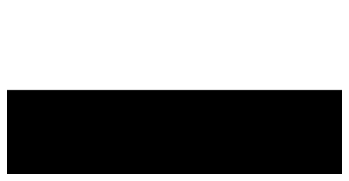

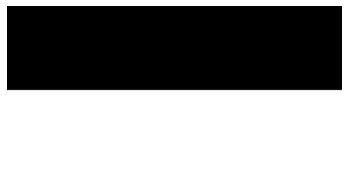

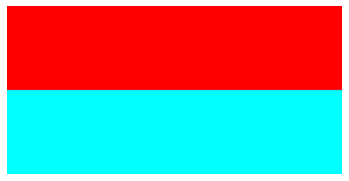

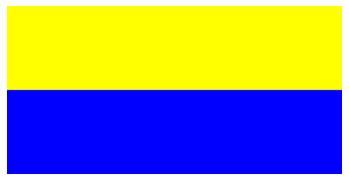

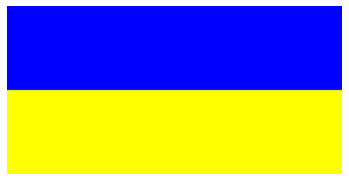

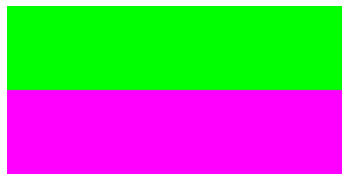

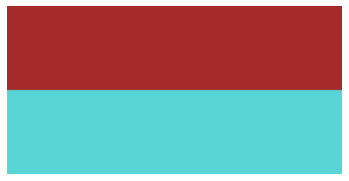

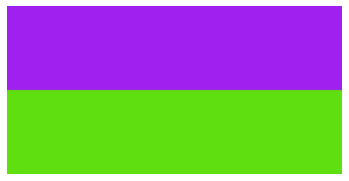

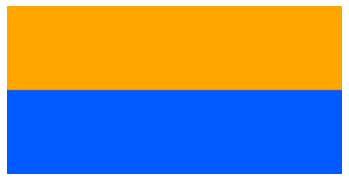

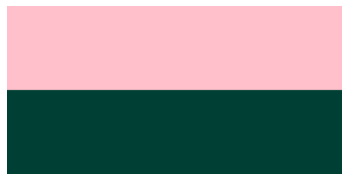

In [76]:
#making squares of complementary colours: complementary colours add to 255 and cancel each other out to make white
#so make a data frame of white (255,255,255) and subtract RGB of colours to find their complement
white_ary = np.zeros((len(known_cterms),3))
for idx,name in enumerate (known_cterms):
    white_ary[idx]=255

#arrays for the complementary terms, both of X11 and users choice; 
#option here to add code to return names and values 
#call subtract function
complement_ary_x11 = subtract(white_ary, cterms_ary)
complement_ary = subtract(white_ary, meanRGB_ary)

#iterate through complementary X11 values and map to their corresponding term in the array  
# call makeimage funciton
for idx, name in enumerate(complement_ary_x11):
    print(makeimage(name, cterms_ary[idx]))

print(euclidist3D(complement_ary_x11, cterms_ary))


<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42B1B5490>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42B4AD460>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A18B6D0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A188790>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42C669940>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE429F92A60>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42ACA06A0>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A9E9850>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42A656820>
<PIL.Image.Image image mode=RGB size=200x100 at 0x7FE42AAE2BE0>
[342.44373555 349.25533367 262.4187921  270.43876261 164.95808714
 133.4537581  220.56489396 149.65117611 234.21967066 210.9160987 ]


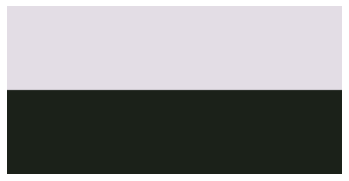

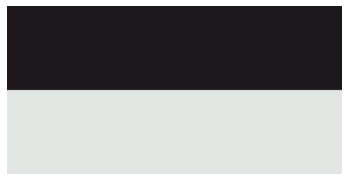

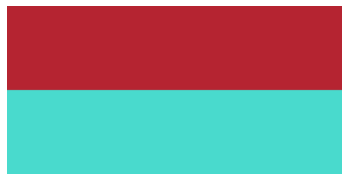

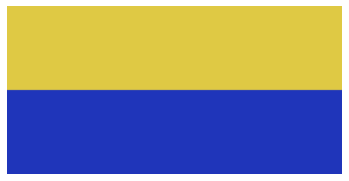

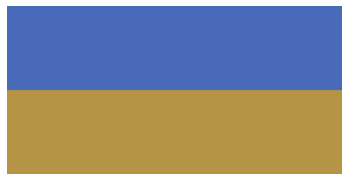

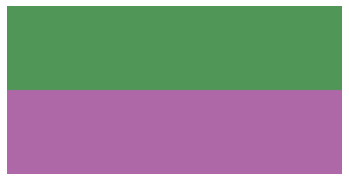

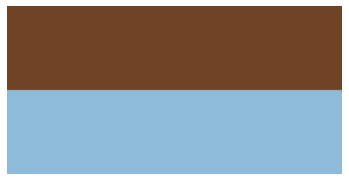

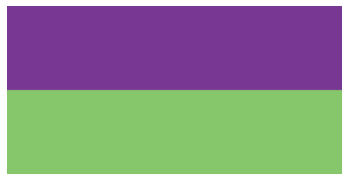

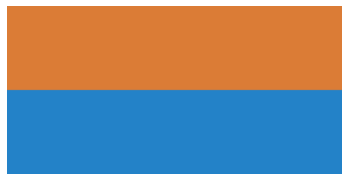

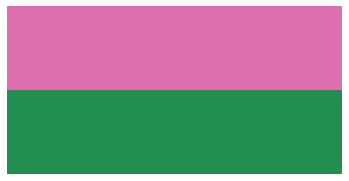

In [66]:
#Again for RGB averages 
for idx, name in enumerate(complement_ary):
    
    print(makeimage(name, meanRGB_ary[idx]))
print(euclidist3D(complement_ary, meanRGB_ary))


## Results

This representation also exposes some of the differences in computer vs human colour identification. The computational colours might express a more objective relationship, this must be balanced against human colour perception. Though subjective, human perception represents actual colour experience and is highly context dependent. 

For example, the relationships between colours and their opposites for X11 colours shows a closer mathematical relationship between basic colours than the averages. This is evident in the fact that the complementary colours for white, black, yellow, blue are the inverse of the other, whereas this relationship is not maintained for human colour averages. Contrasting colours with their opposite reveals more information about the make up of the colours. For example, on a test with khaki, the computer value looks more yellow when compared to its opposite, a darker blue, but a lighter shade of khaki when compared to human averages.

This reveals information about human colour perception that understands colours in context. The perceived colour changes when displayed next to other colours as it brings out different underlying hues. This effect cannot be accounted for by a simple computational understanding of colours. 


# Implications and Conclusions 


This report is based on an analysis using data science techniques. It is therefore important to consider the implications of this. The techniques used provide an insight into the patterns and relationships between colours based on the difference between RGB values. The nature of this analysis means that patterns can be drawn, but that causal factors for the difference must be attributed by human analysis of the patterns. Many factors might be inferred from the observed difference, but this inference is not guaranteed to be correct. 

The purpose of colour naming is relevant to which RGB values map to terms. For example, the X11 colour reference list has been developed for computer display systems, so must map fine-grained, unique colours and names. The colour naming set, on the other hand, is based on averages calculated from humans naming colours. The human named colours are generally less 'pure' on account of this, since this colour labelling is based on broad labels for each colour, the average includes a range of points. It is also likely that people use colour terms differently for a more general purpose of colour identification and communication, so each general term will refer to a wider range of colours. An artist, for example, might have a wider range of used colour terms where finer-grained colour distinctions are required. 

Colour naming categories are also not uniform between languages. Some languages divide the colour spectrum differently, which might have an impact on how colours are perceived. For example, in Russian, light blue and dark blue have distinct colour names [голубой, синий - colour discrimination](https://www.pnas.org/content/104/19/7780), that is shown to have an impact on colour identification. Colours that occur on the boundary of two basic colours are much harder to identify, and this effect is translated where languages like Russian contain extra basic colour terms.




# Ethical Considerations, possible unintended consequences

Here I will briefly address some of the ethical implications of this code. Using data sets to draw conclusions in data science is illuminating but inherently limited. As referenced above, patterns illuminated by data analysis must be explained by humans and there are likely several explanations that underlie the patterns. It also requires that colours be separated into distinct categories along some lines, which must be artificially drawn. 

This code could be implemented as a language test, identifying the distance between the leaner's colour name and the RGB reference for that colour. Since the categorisation of colours is both arbitrary and also language dependent, it is possible that such a test misidentifies incorrectly named colours, which could lead to unfair results. 

Using the generated complementary colours might also lead to undesirable results without additional human judgement. Complementary colours are meant to provide the strongest contrast because they are opposites, so using them together can make visually obvious distinctions. However, for some examples, it is not so clear to a perceiver. If they are blindly followed for design purposes to highlight important information, like in a stop sign, some of this effect might be lost with potential consequences.

A larger dataset should theoretically be more accurate; however it is difficult to control when colour separations are fairly arbitrary and many terms can map to many colours and vice versa. The result of this is that a computer may not be able to express the kind of judgement that humans can when it comes to overlapping colours

# References
resources


• include: Complementary colours subtract from 180
• some random websites you can say helped you 
• reference to dimis colour naming website 
• numpy and pandas library guidelines 
• reference to ethics of data science 
• reference the colour vision thing


In [75]:
import io
from nbformat import current
filepath = "AE2assignment.ipynb"
with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
#markdown count
md_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        md_count += len(cell['source'].strip().split())
print(f' Words in MarkDown: {md_count}')
#heading count
head_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "heading":
        head_count += len(cell['source'].replace('#', '').strip().split())
print(f' Words in Headings: {head_count}')
#codecount
code_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "code":
        code_count += len(cell['input'].replace('#', '').strip().split())
print(f' Words in code: {code_count}')
print(code_count + head_count + md_count)

 Words in MarkDown: 1747
 Words in Headings: 16
 Words in code: 985
2748
